# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Get weather data
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
weather_json
# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': 25.5701, 'lat': -33.918}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 50, 'feels_like': 48.45, 'temp_min': 50, 'temp_max': 50, 'pressure': 1024, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 280}, 'clouds': {'all': 0}, 'dt': 1619924406, 'sys': {'type': 1, 'id': 1973, 'country': 'ZA', 'sunrise': 1619931189, 'sunset': 1619969765}, 'timezone': 7200, 'id': 964420, 'name': 'Port Elizabeth', 'cod': 200}.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Get weather data
print("Beginning Data Retrival")
print("------------------------------")
set_counter = 1
record_counter = 0

new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

for city in cities:

    
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 1

    print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
    try:
        weather_response = requests.get(query_url  + city)
        weather_json = weather_response.json()
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        temp.append(weather_json['main']['temp_max'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        wind.append(weather_json['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found. Skipping...")
        pass
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrival
------------------------------
Processing Record 1 of Set 1 | broken hill
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | kloulklubed
Processing Record 8 of Set 1 | austintown
Processing Record 9 of Set 1 | vao
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | omboue
Processing Record 12 of Set 1 | tsuruoka
Processing Record 13 of Set 1 | chegdomyn
Processing Record 14 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 1 | vytegra
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | alofi
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | port alfred
Process

City not found. Skipping...
Processing Record 40 of Set 4 | barra do garcas
Processing Record 41 of Set 4 | aklavik
Processing Record 42 of Set 4 | moche
Processing Record 43 of Set 4 | lorengau
Processing Record 44 of Set 4 | clyde river
Processing Record 45 of Set 4 | wenling
Processing Record 46 of Set 4 | nkowakowa
Processing Record 47 of Set 4 | bolshaya martynovka
Processing Record 48 of Set 4 | tura
Processing Record 49 of Set 4 | cidreira
Processing Record 50 of Set 4 | medicine hat
Processing Record 1 of Set 5 | caravelas
Processing Record 2 of Set 5 | nantucket
Processing Record 3 of Set 5 | okuchi
Processing Record 4 of Set 5 | airai
Processing Record 5 of Set 5 | morgan city
Processing Record 6 of Set 5 | solnechnyy
Processing Record 7 of Set 5 | muisne
Processing Record 8 of Set 5 | carnarvon
Processing Record 9 of Set 5 | beringovskiy
Processing Record 10 of Set 5 | hildburghausen
Processing Record 11 of Set 5 | marcona
City not found. Skipping...
Processing Record 12 of 

Processing Record 30 of Set 8 | vaxjo
Processing Record 31 of Set 8 | dibulla
Processing Record 32 of Set 8 | dingle
Processing Record 33 of Set 8 | utiroa
City not found. Skipping...
Processing Record 34 of Set 8 | askino
Processing Record 35 of Set 8 | mayumba
Processing Record 36 of Set 8 | camacha
Processing Record 37 of Set 8 | paamiut
Processing Record 38 of Set 8 | mitsamiouli
Processing Record 39 of Set 8 | ishim
Processing Record 40 of Set 8 | brae
Processing Record 41 of Set 8 | walvis bay
Processing Record 42 of Set 8 | vorobyevka
Processing Record 43 of Set 8 | mrirt
City not found. Skipping...
Processing Record 44 of Set 8 | rudbar
Processing Record 45 of Set 8 | deputatskiy
Processing Record 46 of Set 8 | chapais
Processing Record 47 of Set 8 | nguiu
City not found. Skipping...
Processing Record 48 of Set 8 | batu
Processing Record 49 of Set 8 | sistranda
Processing Record 50 of Set 8 | sisimiut
Processing Record 1 of Set 9 | qom
Processing Record 2 of Set 9 | eravur
Proc

Processing Record 16 of Set 12 | sohag
Processing Record 17 of Set 12 | sao joao da barra
Processing Record 18 of Set 12 | cassilandia
Processing Record 19 of Set 12 | puerto narino
Processing Record 20 of Set 12 | kirakira
Processing Record 21 of Set 12 | vestmannaeyjar
Processing Record 22 of Set 12 | abu zabad
Processing Record 23 of Set 12 | diu
Processing Record 24 of Set 12 | evensk
Processing Record 25 of Set 12 | imeni poliny osipenko
Processing Record 26 of Set 12 | aflu
City not found. Skipping...
Processing Record 27 of Set 12 | kandrian
Processing Record 28 of Set 12 | varadero
Processing Record 29 of Set 12 | university city
Processing Record 30 of Set 12 | nhulunbuy
Processing Record 31 of Set 12 | otukpo
Processing Record 32 of Set 12 | eyl
Processing Record 33 of Set 12 | sainte-rose
Processing Record 34 of Set 12 | djougou
Processing Record 35 of Set 12 | plastun
Processing Record 36 of Set 12 | pashiya
Processing Record 37 of Set 12 | severo-yeniseyskiy
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data={"City":new_cities,
              "Lat":lat,
              "Lng":lng,
              "Max Temp":temp,
              "Humidity":humidity,
              "Cloudiness":cloudiness,
              "Wind Speed":wind,
              "Country":country,
              "Date":date
             }
weather_data_df=pd.DataFrame(weather_data)
weather_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,broken hill,-31.9500,141.4333,78.80,27,0,10.36,AU,1619924407
1,tiksi,71.6872,128.8694,26.64,91,100,5.23,RU,1619924408
2,port elizabeth,-33.9180,25.5701,50.00,81,0,4.61,ZA,1619924406
3,cape town,-33.9258,18.4232,60.01,93,0,4.61,ZA,1619924400
4,albany,42.6001,-73.9662,48.99,52,99,1.92,US,1619924175
...,...,...,...,...,...,...,...,...,...
572,caluquembe,-13.7833,14.6833,59.81,89,100,0.36,AO,1619924591
573,los llanos de aridane,28.6585,-17.9182,66.20,63,75,6.91,ES,1619924592
574,gillette,44.2911,-105.5022,61.00,44,90,9.22,US,1619924592
575,cornwall,45.0181,-74.7281,42.80,49,90,5.75,CA,1619924402


In [7]:
# Save the updated dataframe as a csv
weather_data_df.to_csv("../Output_Data/weather_data_df.csv", encoding="utf-8", index=False)

In [8]:
weather_stats_df = weather_data_df.describe()
weather_stats_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,20.255620,18.051273,61.894541,68.164645,53.847487,7.791282,1.619924e+09
std,32.791426,89.370696,18.374729,21.473795,39.066863,5.595995,7.722141e+01
min,-54.800000,-179.166700,10.400000,1.000000,0.000000,0.360000,1.619924e+09
25%,-6.550000,-59.516700,48.000000,57.000000,16.000000,3.710000,1.619924e+09
50%,24.633300,21.615800,64.400000,72.000000,59.000000,6.910000,1.619924e+09
75%,47.804300,96.128500,77.000000,85.000000,95.000000,10.420000,1.619925e+09
max,78.218600,179.316700,91.650000,100.000000,100.000000,43.730000,1.619925e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_stats_df = weather_data_df.describe()
weather_stats_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,20.255620,18.051273,61.894541,68.164645,53.847487,7.791282,1.619924e+09
std,32.791426,89.370696,18.374729,21.473795,39.066863,5.595995,7.722141e+01
min,-54.800000,-179.166700,10.400000,1.000000,0.000000,0.360000,1.619924e+09
25%,-6.550000,-59.516700,48.000000,57.000000,16.000000,3.710000,1.619924e+09
50%,24.633300,21.615800,64.400000,72.000000,59.000000,6.910000,1.619924e+09
75%,47.804300,96.128500,77.000000,85.000000,95.000000,10.420000,1.619925e+09
max,78.218600,179.316700,91.650000,100.000000,100.000000,43.730000,1.619925e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.

In [11]:
bad_data=weather_data_df.loc[(weather_data_df["Humidity"] > 100)].index
bad_data

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_data_df.drop(index=bad_data,inplace=False)
clean_city_data.info()
clean_city_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        577 non-null    object 
 1   Lat         577 non-null    float64
 2   Lng         577 non-null    float64
 3   Max Temp    577 non-null    float64
 4   Humidity    577 non-null    int64  
 5   Cloudiness  577 non-null    int64  
 6   Wind Speed  577 non-null    float64
 7   Country     577 non-null    object 
 8   Date        577 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 45.1+ KB


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,broken hill,-31.9500,141.4333,78.80,27,0,10.36,AU,1619924407
1,tiksi,71.6872,128.8694,26.64,91,100,5.23,RU,1619924408
2,port elizabeth,-33.9180,25.5701,50.00,81,0,4.61,ZA,1619924406
3,cape town,-33.9258,18.4232,60.01,93,0,4.61,ZA,1619924400
4,albany,42.6001,-73.9662,48.99,52,99,1.92,US,1619924175


In [13]:
# Save the updated dataframe as a csv
clean_city_data.to_csv("../Output_Data/clean_city_data.csv", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

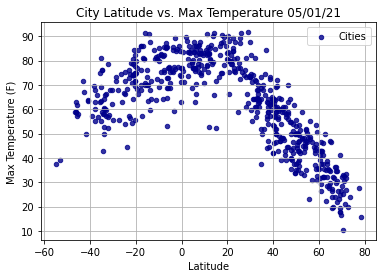

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

clean_city_data.plot(kind='scatter', x='Lat', y='Max Temp', c='DarkBlue'
,linewidths=1, marker="o",alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
# Save the figure.
plt.savefig("../Output_Data/LatitudeVsTemperature.png")
plt.show()

In [15]:
# Making a scatter plot to determine to determine the correlation between Latitude and Temperature.
# The size of each point on our plot is determined by their x value
# The closer the data points, the higher the correlation between the two variables and the stronger the relationship.

## Latitude vs. Humidity Plot

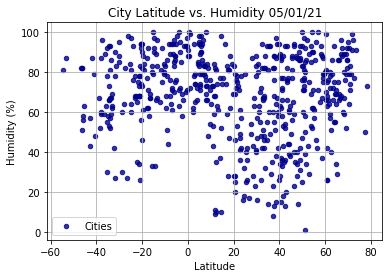

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

clean_city_data.plot(kind='scatter', x='Lat', y='Humidity', c='DarkBlue'
,linewidths=1, marker="o",alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
# Save the figure.
plt.savefig("../Output_Data/LatitudeVsHumidity.png")
plt.show()

In [17]:
# Making a scatter plot to determine the correlation between Latitude and Humidity.
# The data points doesn't appear to be closer, and we cannot determine a positive linear relationship between Latitude and Humidity.

## Latitude vs. Cloudiness Plot

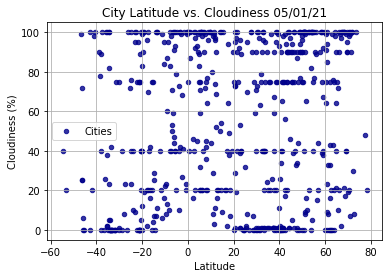

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

clean_city_data.plot(kind='scatter', x='Lat', y='Cloudiness', c='DarkBlue'
,linewidths=1, marker="o",alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
# Save the figure.
plt.savefig("../Output_Data/LatitudeVsCloudiness.png")
plt.show()

In [19]:
# Making a scatter plot to determine the correlation between Latitude and Cloudiness.
# The correlation between the two variables are lower and it doesn't appear to be stronger the relationship between Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

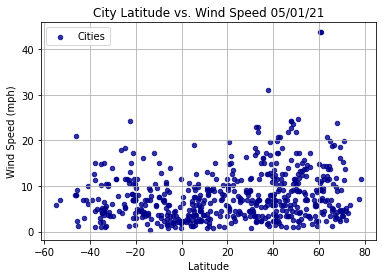

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

clean_city_data.plot(kind='scatter', x='Lat', y='Wind Speed', c='DarkBlue'
,linewidths=1, marker="o",alpha=0.8, label="Cities")
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
# Save the figure.
plt.savefig("../Output_Data/LatitudeVsWindSpeed.png")
plt.show()

In [21]:
# Making a scatter plot to determine the correlation between Latitude and Wind Speed.
# There appears to be some correlation and a stronger relationship between Latitude and Wind Speed.

## Linear Regression

In [22]:
# The second requirement is to run linear regression on each relationship. 
# This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) 
# and Southern Hemisphere (less than 0 degrees latitude):

clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
northern_hemisphere_df = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
southern_hemisphere_df = clean_city_data.loc[(clean_city_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8027736917616561


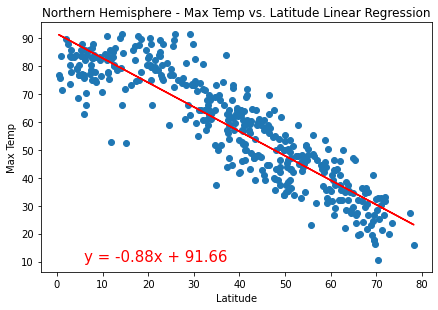

In [23]:
# Run the linear regression on hemisphere weather data.
# and plot a regression line and the equation with the data.x_axis=northern_hemisphere_df["Lat"]
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression',fontsize =12)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Max Temp',fontsize =10)
print(f"The r-value is: {rvalue**2}")
# Save the figure.
plt.savefig("../Output_Data/MaxTempVsLatitude-N.png")
plt.show()

In [24]:
# Looking at the Max Temp vs. Latitude (Northern Hemisphere) Linear Regression figure, it does appear there's a negative 
# linear relationship between Temperature and Latitude. 
# That is, as the Latitude (Northern Hemisphere) increases, there is a decrease in temperature. 
# This does not suggest that an increase in Latitude causes temperature to increase or vice versa.
# There is no correlation between Temperature and Latitude (Northern Hemisphere). 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8027736917616561


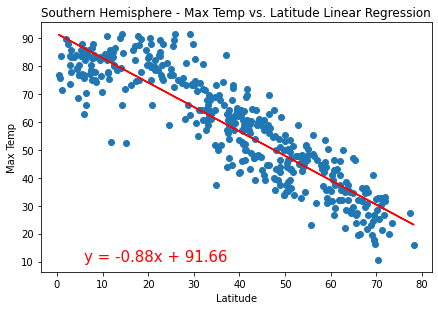

In [25]:
# Run the linear regression on hemisphere weather data.
# and plot a regression line and the equation with the data.x_axis=southern_hemisphere_df["Lat"]
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression',fontsize =12)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Max Temp',fontsize =10)
print(f"The r-value is: {rvalue**2}")
# Save the figure.
plt.savefig("../Output_Data/MaxTempVsLatitude-S.png")
plt.show()

In [26]:
# Looking at the Max Temp vs. Latitude (Southern Hemisphere) Linear Regression figure, it does appear there's a negative 
# linear relationship between Temperature and Latitude. 
# That is, as the Latitude (Southern Hemisphere) increases, there is a decrease in temperature. 
# This does not suggest that an increase in Latitude causes temperature to increase or vice versa.
# There is no correlation between Temperature and Latitude (Southern Hemisphere). 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.001824710820943181


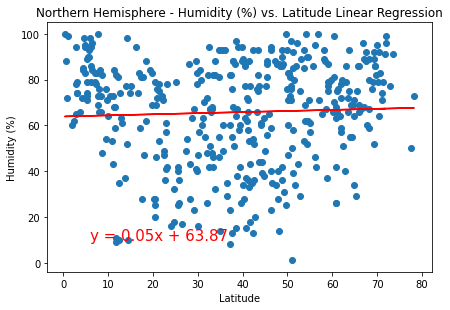

In [27]:
# Run the linear regression on hemisphere weather data.
# and plot a regression line and the equation with the data.x_axis=northern_hemisphere_df["Lat"]
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression',fontsize =12)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Humidity (%)',fontsize =10)
print(f"The r-value is: {rvalue**2}")
# Save the figure.
plt.savefig("../Output_Data/HumidityVsLatitude-N.png")
plt.show()

In [28]:
# Looking at the Humidity vs. Latitude (Northern Hemisphere) Linear Regression figure, it does appear there's a positive 
# linear relationship between Humidity and Latitude. 
# That is, as the Latitude (Northern Hemisphere) increases, there is an increase in humidity. 
# This does not suggest that an increase in Latitude causes humidity to increase or vice versa.
# This analysis is just showing that there's a correlation between Humidity and Latitude (Northern Hemisphere). 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.001824710820943181


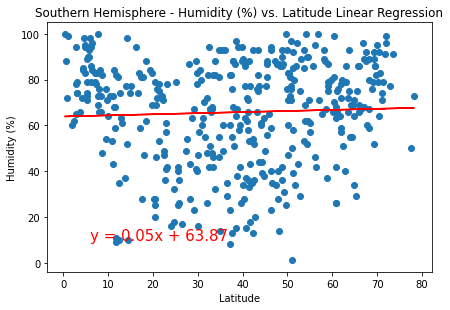

In [29]:
# Run the linear regression on hemisphere weather data.
# and plot a regression line and the equation with the data.x_axis=southern_hemisphere_df["Lat"]
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression',fontsize =12)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Humidity (%)',fontsize =10)
print(f"The r-value is: {rvalue**2}")
# Save the figure.
plt.savefig("../Output_Data/HumidityVsLatitude-S.png")
plt.show()

In [30]:
# Looking at the Humidity vs. Latitude (Southern Hemisphere) Linear Regression figure, there seems to be a positive 
# linear relationship between Humidity and Latitude. 
# That is, as the Latitude (Southern Hemisphere) increases, the weather seems to be more humid. 
# This does not suggest that an increase in Latitude causes humidity to increase or vice versa.
# This analysis is just showing that there is some positive correlation between Humidity and Latitude (Southern Hemisphere). 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0008805364771826367


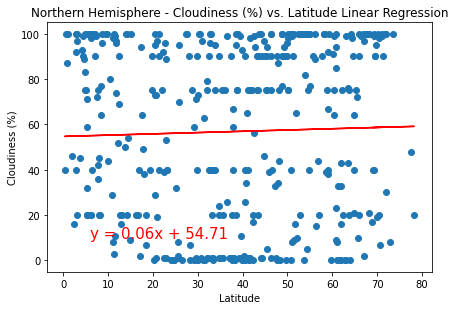

In [31]:
# Run the linear regression on hemisphere weather data.
# and plot a regression line and the equation with the data.x_axis=northern_hemisphere_df["Lat"]
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',fontsize =12)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Cloudiness (%)',fontsize =10)
print(f"The r-value is: {rvalue**2}")
# Save the figure.
plt.savefig("../Output_Data/CloudinessVsLatitude-N.png")
plt.show()

In [32]:
# Looking at the Cloudiness vs. Latitude (Northern Hemisphere) Linear Regression figure, it does appear there's a positive 
# linear relationship between Cloudiness and Latitude. 
# That is, as the Latitude (Northern Hemisphere) increases, there is an increase in cloudiness. 
# This analysis is just showing that there's a correlation between cloudiness and Latitude (Northern Hemisphere). 
# It does not suggest that an increase in Latitude causes a cloudy weather.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0008805364771826367


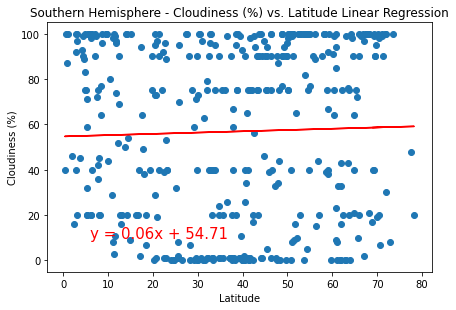

In [33]:
# Run the linear regression on hemisphere weather data.
# and plot a regression line and the equation with the data.x_axis=southern_hemisphere_df["Lat"]
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression',fontsize =12)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Cloudiness (%)',fontsize =10)
print(f"The r-value is: {rvalue**2}")
# Save the figure.
plt.savefig("../Output_Data/CloudinessVsLatitude-S.png")
plt.show()

In [34]:
# Looking at the Cloudiness vs. Latitude (Southern Hemisphere) Linear Regression figure, it does appear there's a positive 
# linear relationship between Cloudiness and Latitude. 
# That is, as the Latitude (Southern Hemisphere) increases, there is an increase in cloudiness. 
# This analysis is just showing that there's a correlation between cloudiness and Latitude (Northern Hemisphere). 
# It does not suggest that an increase in Latitude causes cloudiness to increase. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04369784342525702


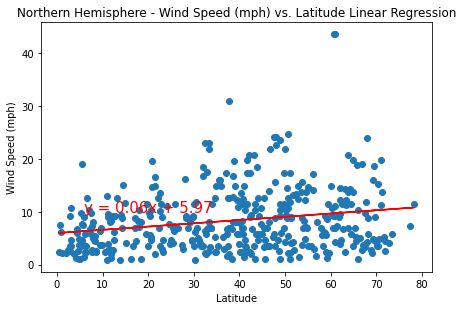

In [35]:
# Run the linear regression on hemisphere weather data.
# and plot a regression line and the equation with the data.x_axis=northern_hemisphere_df["Lat"]
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',fontsize =12)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Wind Speed (mph)',fontsize =10)
print(f"The r-value is: {rvalue**2}")
# Save the figure.
plt.savefig("../Output_Data/WindSpeedVsLatitude-N.png")
plt.show()

In [36]:
# Looking at the Wind Speed vs. Latitude (Northern Hemisphere) Linear Regression figure, it does appear there's some 
# positive relationship between Wind Speed and Latitude. 
# That is, as the Latitude (Northern Hemisphere) increases, there is an increase in wind speed. 
# This analysis is just showing that there's some correlation between wind speed and Latitude (Northern Hemisphere). 
# It does not suggest that an increase in Latitude causes an increase in wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04369784342525702


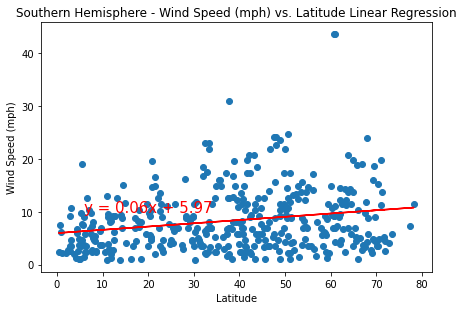

In [37]:
# Run the linear regression on hemisphere weather data.
# and plot a regression line and the equation with the data.x_axis=southern_hemisphere_df["Lat"]
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.tight_layout()
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression',fontsize =12)
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Wind Speed (mph)',fontsize =10)
print(f"The r-value is: {rvalue**2}")
# Save the figure.
plt.savefig("../Output_Data/WindSpeedVsLatitude-S.png")
plt.show()

In [38]:
# Looking at the Wind Speed vs. Latitude (Southern Hemisphere) Linear Regression figure, it does appear there's some 
# positive relationship between Wind Speed and Latitude. 
# That is, as the Latitude (Southern Hemisphere) increases, there is some increase in wind speed. 
# This analysis is just showing that there's some correlation between wind speed and Latitude (Southern Hemisphere). 
# It does not suggest that an increase in Latitude causes an increase in wind speed or vice versa.

In [39]:
####CONCLUSION

In [40]:
# For Part I, you must include a written description of three observable trends based on the data.

# While using the Openweathermap API to determine the weather for 500+ cities around the world, 
# I noticed a few different insights. The insights are below:

# Insights
# In the Temperature vs. Latitude scatter plot, as the latitude increases the temperature increases.
# In the Wind Speed (mph) vs. Latitude scatter plot, the average when speed for all cities is fairly low.
# The wind speeds are higher on average at the north and south poles.


In [41]:
# For Part II, screenshot of the heatmaps are posted here - output_data_folder = "output_data"